# Image Compression #

We can use clustering as a means to compress images. But it's going to work a little differently than what you are used to: Instead of guessing at the number of clusters, we purposely choose the k-value depending on how much compression we desire. The lower the k-value, the higher the compression but the more distorted the picture. The higher the k-value, the lower the compression but the picture will look closer to the original. We'll be using k-values of 256. I chose this number because we can represent 256 clusters with 8 bits.

The clustering algorithm will give us a palette of RGB colors that "represent" the overall image. So for the 256 cluster algorithm, we'll have 256 colors in our palette. These palette colors are actually the centroids from the algorithm. Once K-means chooses the color palette for us, we'll replace the original pixels with these representative values (e.g., the identity of their cluster).

We'll go ahead and use the SKLearn version of K-means as our clustering algorithm. If you'd like to substitute your own version of K-means, that's OK too although it might be slower.

In [2]:
import numpy as np
from sklearn.cluster import KMeans
from matplotlib.image import imread
import matplotlib.pyplot as plt

## Preprocessing ##

Load the image file from disk and reshape it from a 2D dataset of RGB pixels to a really long sequence of RGB pixels one after the other. Basically, we're going to tack the second row to the end of the first row, the third row to the end of the second row, the fourth row to the end of the third row, and so on for the entire image.

In [3]:
IMAGE_FILE = 'hershey.bmp'

# Read the file from disk
img = imread(IMAGE_FILE)
print(f"\nnumpy shape = {img.shape}")

(height, width, depth) = img.shape
print(f"Height = {height} pixels")
print(f"Width = {width} pixels")
print(f"Depth = {depth} bytes")

print("Pixels:")
print(img)


numpy shape = (574, 590, 3)
Height = 574 pixels
Width = 590 pixels
Depth = 3 bytes
Pixels:
[[[177 124 106]
  [174 121 103]
  [171 118 100]
  ...
  [127 115  63]
  [127 116  62]
  [127 116  62]]

 [[174 121 103]
  [171 118 100]
  [168 115  97]
  ...
  [125 113  61]
  [125 114  60]
  [125 114  60]]

 [[171 118 100]
  [169 116  98]
  [166 113  95]
  ...
  [125 113  61]
  [124 112  60]
  [124 112  60]]

 ...

 [[204  71  78]
  [202  79  82]
  [200  87  87]
  ...
  [141 122 105]
  [140 121 104]
  [138 119 102]]

 [[204  70  77]
  [202  78  81]
  [201  86  88]
  ...
  [147 126 109]
  [145 124 106]
  [144 123 105]]

 [[204  70  77]
  [202  78  81]
  [200  84  87]
  ...
  [152 131 114]
  [150 129 110]
  [150 129 109]]]


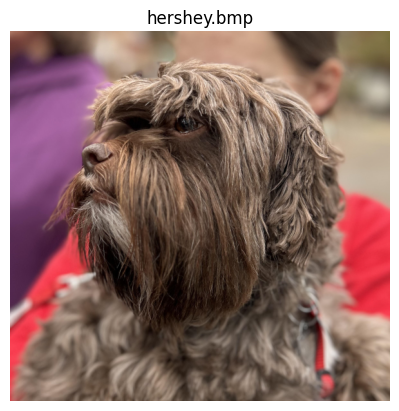

In [4]:
# Double check that we have the right image
plt.title(IMAGE_FILE)
plt.imshow(img)
plt.axis('off')
plt.show()

In [5]:
# Convert image from HxWxD array to just a long list of pixel values
print(f"before reshape = {img.shape}")
X = img.reshape(width * height, depth)
print(f" after reshape = {X.shape}")

before reshape = (574, 590, 3)
 after reshape = (338660, 3)


In [6]:
# Show that the rows are just placed one after the other
print("Before:")
print(img[0][0:3])
print()
print("After:")
print(X[0:3])

Before:
[[177 124 106]
 [174 121 103]
 [171 118 100]]

After:
[[177 124 106]
 [174 121 103]
 [171 118 100]]


## Compress the Data ##

The K-means Algorithm will cluster the individual pixels and give us $k$ representative colors that are somewhat similar to the individual samples (pixel colors) in the cluster. The centroids will be our new (compressed) RGB values and the labels will identify each pixel and which compressed color represents it.

In [7]:
NUMBER_OF_COLORS = 256

# Runs the K-means algorithm multiple times and select the best cluster score
km = KMeans(n_clusters=NUMBER_OF_COLORS, n_init='auto')
km.fit(X)
print("Palette Identified")

Palette Identified


In [8]:
# The new pixel values are just the cluster IDs
pixels = km.labels_.astype(np.uint8)
print(f"{len(pixels)} Compressed Pixels:  {pixels[0]} {pixels[1]} ... {pixels[-2]} {pixels[-1]}")

# We need to store the original RGB colors of each pixel
# This "color palette" will map cluster IDs back to the correct RGB colors
# Since the RGB values come from our K-means centroids, they are float values
# that must be converted to integers: round then truncate for accuracy
palette = np.round(km.cluster_centers_, 0).astype(np.uint8)
print(f"{len(palette)} Palette Colors: {palette[0]} {palette[1]} ... {palette[-2]} {palette[-1]}")

338660 Compressed Pixels:  229 229 ... 217 217
256 Palette Colors: [138 120 106] [63 50 42] ... [90 62 47] [120 104  93]


### Exploring the Compressed Data ###

The original data contained pixels that were defined by three 8-bit numbers (R, G, and B). We've used K-means to select 256 representative colors. This means we'll have taken 3 x 8-bit numbers (24 bits) and compressed it down to a single 8-bit number. That's approximately a compression ratio of $3 \rightarrow 1$.

We say *approximately* the compression ratio instead of *exactly* the compression ratio becuase in addition to storing the 8-bit pixel values, we also have to store the full RGB values for the 256 colors in the palette. But this factor is negligible.

In [9]:
# original first 5 pixels
print("Original Data")
print(img[0][0:5])

# First 5 pixels with their new reprentative
print("\nCompressed Data")
print(pixels[:5])

print("\nWhat is compressed color #{}?".format(pixels[0]))
print(palette[pixels[0]])

Original Data
[[177 124 106]
 [174 121 103]
 [171 118 100]
 [170 117  99]
 [169 116  98]]

Compressed Data
[229 229 229 229 243]

What is compressed color #229?
[177 119 103]


In [10]:
print("Here are all the colors:")
print(palette)

Here are all the colors:
[[138 120 106]
 [ 63  50  42]
 [197 180 154]
 [235  49  67]
 [108  83  68]
 [ 31  14   8]
 [146  86 140]
 [191 156 132]
 [ 82  68  58]
 [123  98  82]
 [227 215 209]
 [150 138 129]
 [110  61 105]
 [200 100  98]
 [196  53  61]
 [ 62  42  30]
 [ 89  45  82]
 [168 103 162]
 [167 138 116]
 [248  70  88]
 [166 155 142]
 [ 37  20  12]
 [220 200 185]
 [ 75  35  69]
 [ 71  58  49]
 [ 99  73  58]
 [122 109 100]
 [ 46  29  19]
 [166 124 101]
 [115  97  84]
 [214 191 173]
 [ 12   3   2]
 [206 165 142]
 [243  97 106]
 [130  75 123]
 [126  46  72]
 [ 82  61  47]
 [132 114  75]
 [146 128 113]
 [127  79  67]
 [126 107  93]
 [218  90  92]
 [157  94 152]
 [ 99  80  67]
 [184 146 120]
 [118  94  77]
 [153 108  88]
 [186 170 144]
 [247  63  81]
 [198 184 168]
 [ 48  36  33]
 [154 130 114]
 [159  55  56]
 [191 128 180]
 [ 69  51  39]
 [137 112  97]
 [219  41  59]
 [106  87  74]
 [ 98  54  53]
 [182  81  80]
 [232 129 127]
 [173 146 125]
 [159 142 126]
 [206 154 144]
 [ 90  75  66]


### Viewing the Color Palette ###

Just for fun, let's see what the 16 representative colors look like. We'll create an 8x8 plot where each plot shows a 100x100 solid block of color.

In [11]:
# Let's try creating a 100x100 block and see what it looks like
block = np.full([100, 100, 3], palette[0])
block[0][:5]

array([[138, 120, 106],
       [138, 120, 106],
       [138, 120, 106],
       [138, 120, 106],
       [138, 120, 106]], dtype=uint8)

In [12]:
# That worked, so now let's create 32 of these blocks, one for each color in our palette
blocks = [np.full([100, 100, 3], color) for color in palette]
for i in range(5):
    print(f"Palette Color #{i}")
    print(f"{blocks[i][0][:3]}\n")

Palette Color #0
[[138 120 106]
 [138 120 106]
 [138 120 106]]

Palette Color #1
[[63 50 42]
 [63 50 42]
 [63 50 42]]

Palette Color #2
[[197 180 154]
 [197 180 154]
 [197 180 154]]

Palette Color #3
[[235  49  67]
 [235  49  67]
 [235  49  67]]

Palette Color #4
[[108  83  68]
 [108  83  68]
 [108  83  68]]



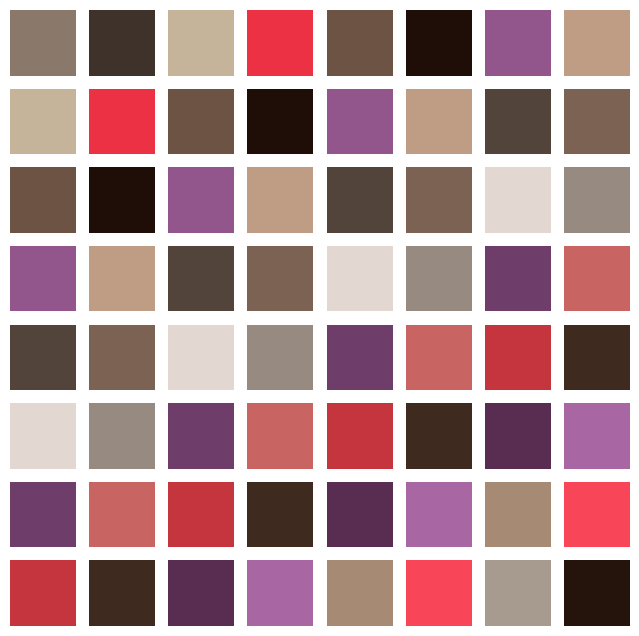

In [13]:
# And now we'll plot them to the screen
fig, ax = plt.subplots(8, 8, figsize=(8,8))
for i in range(ax.shape[0]):
    for j in range(ax.shape[1]):
        ax[i][j].axis('off')
        color_index = i*2+j
        ax[i][j].imshow(blocks[color_index])
plt.show()

## Saving/Loading the Compressed Image ##

To save the image we would need to store the palette, the sequence of pixels (ID#s from the palette), and a few other pieces of information.

Here is each piece of data, probably in the reverse order that it should appear in our file. 

In [14]:
# 1. We'll need to save the pixels
pixels[:1000]

array([229, 229, 229, 229, 243, 243, 243, 243, 243, 243, 243,  46,  46,
        46,  46,  46, 247, 247, 247, 247, 247, 247, 180, 180, 180, 180,
       180, 180,  39,  39,  39,  39, 145, 145, 145, 145, 145, 145, 188,
       188, 188, 188, 188, 188, 188, 188, 188, 212,  58,  58, 254, 254,
       254, 254, 143, 143, 143, 143, 143, 143, 143, 143, 118, 118, 118,
       118, 118, 118, 118, 207, 207, 207, 126, 155, 155, 155,  25, 139,
        25, 139, 139, 139, 139, 139,  89,  89,  89,  89,  89,  89,  89,
         4,  89,   4,   4,   4,   4, 165, 165, 165, 165,  45,  45,  45,
        45,  45,  45,  45,  45,  45,  45,   9,   9,   9,   9, 164, 164,
       250, 250,  55, 195, 195, 215,  67, 190, 235, 235,  18,  18, 224,
        61,  61,  61,  87,  87,  87, 232, 232, 232, 173, 173, 111, 111,
       111, 111, 111, 111, 111, 111, 111, 111, 111, 111, 111, 111, 111,
       111, 111,  32,  32,  32,  32,  32,  32, 133,  32,  32,  32,  32,
        32,  32,  32,  32, 141, 141, 141, 141, 141, 141, 141, 14

In [15]:
# 2. We'll need to save the palette
palette

array([[138, 120, 106],
       [ 63,  50,  42],
       [197, 180, 154],
       [235,  49,  67],
       [108,  83,  68],
       [ 31,  14,   8],
       [146,  86, 140],
       [191, 156, 132],
       [ 82,  68,  58],
       [123,  98,  82],
       [227, 215, 209],
       [150, 138, 129],
       [110,  61, 105],
       [200, 100,  98],
       [196,  53,  61],
       [ 62,  42,  30],
       [ 89,  45,  82],
       [168, 103, 162],
       [167, 138, 116],
       [248,  70,  88],
       [166, 155, 142],
       [ 37,  20,  12],
       [220, 200, 185],
       [ 75,  35,  69],
       [ 71,  58,  49],
       [ 99,  73,  58],
       [122, 109, 100],
       [ 46,  29,  19],
       [166, 124, 101],
       [115,  97,  84],
       [214, 191, 173],
       [ 12,   3,   2],
       [206, 165, 142],
       [243,  97, 106],
       [130,  75, 123],
       [126,  46,  72],
       [ 82,  61,  47],
       [132, 114,  75],
       [146, 128, 113],
       [127,  79,  67],
       [126, 107,  93],
       [218,  90

In [16]:
# 3. How about the dimensions of the picture?
width, height

(590, 574)

In [17]:
# 4. Don't forget that we'll need to explicitely save the number of colors in the palette (256)
len(palette)

256

In [18]:
# 5. Some sort of header field that identifies this as a K-means Clustering Compressed Image
header = 'KMC:'
print(header)

KMC:


## Displaying a Compressed Image ##

Remember, the compressed image is nothing more than the color palette, a sequence of pixel values, and the dimensions of the picture. But there isn't any code written to display images in this format. We'll need to expand/convert our data back to a form that can be used by standard image libraries on our computer.

To display one of our compressed images, we'll need to:
 1. Expand each pixel from its compressed representative value (e.g., 0-255) to the actual 24-bit RGB pixel value (e.g., RGB: 235, 195, 182).
 2. Reshape the data back to a 2D array of RGB pixels.

In [19]:
# This creates a new array that is the same size as pixel array but with pixel data instead of cluster IDs
# Each element in the array is the result of looking up the cluster ID value in the colors32 palette
print(f"Original shape of pixels sequence: {pixels.shape}")
print(f"Sample pixels: {pixels[:5]}")
print(f'shape of palette: {palette.shape}')
compressed_img = palette[pixels]
print(f"New shape of the expanded pixels: {compressed_img.shape}")
print(f"Sample of expanded pixels: {compressed_img[:5]}")

Original shape of pixels sequence: (338660,)
Sample pixels: [229 229 229 229 243]
shape of palette: (256, 3)
New shape of the expanded pixels: (338660, 3)
Sample of expanded pixels: [[177 119 103]
 [177 119 103]
 [177 119 103]
 [177 119 103]
 [161 115  95]]


In [20]:
compressed_img = compressed_img.reshape(height, width, depth)
print("Final shape after converting to 2D:", compressed_img.shape)

Final shape after converting to 2D: (574, 590, 3)


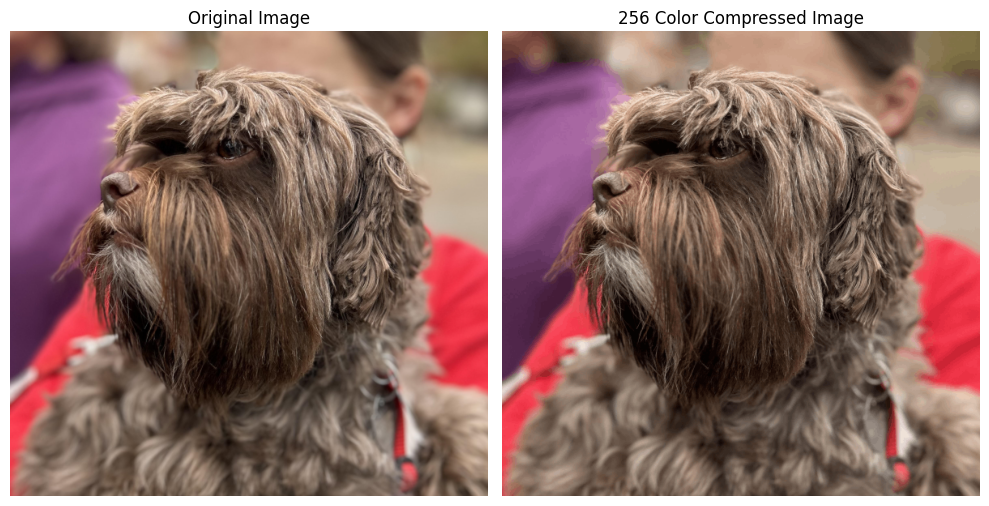

In [21]:
fig, ax = plt.subplots(1, 2, figsize=(10,10))

ax[0].set_title('Original Image')
ax[0].imshow(img)
ax[0].axis('off')

ax[1].set_title('256 Color Compressed Image')
ax[1].imshow(compressed_img)
ax[1].axis('off')

plt.tight_layout()
plt.show()